In [360]:
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import ipywidgets as widgets
from IPython.display import display
from sklearn.decomposition import PCA
import pandas as pd

# Vectors

## How it Looks

An ordered list of numbers. The dimensionality of a vector is the number of its numbers. If the vector contains 2 vectors, its a 2 dimensional vector. If it contains 500, its a 500 dimensional vector.

<b> v1 </b> = [1, 2, 3]

A vector is a straight line with some length and some direction

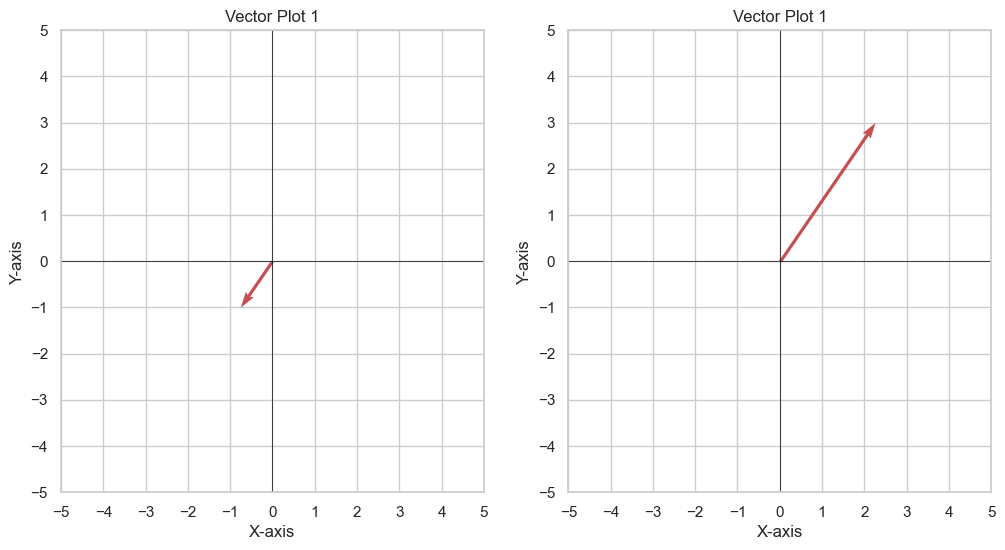

In [361]:
vector = np.array([3, 4])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

origin = np.array([0, 0])

for idx, ax in enumerate((ax1, ax2)):
    ax.set_xticks(np.arange(-5, 6, 1))
    ax.set_yticks(np.arange(-5, 6, 1))
    ax.quiver(*origin, *vector * (idx + -0.25), angles='xy', scale_units='xy', scale=1, color='r')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Vector Plot 1')
    ax.grid(True)

When a vector starts from the origin, its called being in standard position.

3d vector

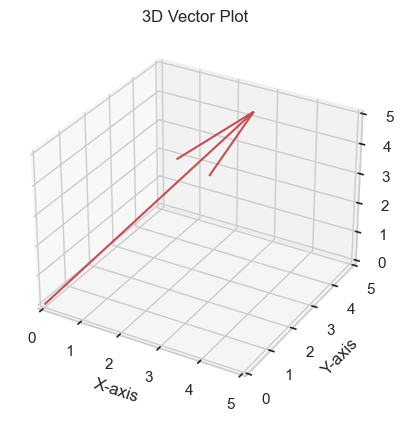

In [294]:
vector = np.array([3, 4, 5])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

origin = np.array([0, 0, 0])

ax.quiver(*origin, *vector, color='r')

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])
ax.set_zlim([0, 5])

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Vector Plot')

plt.show()

## Fields & Dimensions

In [365]:
v1 = np.array([1,2,3])
v1

array([1, 2, 3])

In [366]:
type(v1)

numpy.ndarray

In [367]:
v1.shape

(3,)

Vector v's field is real numbers

Its dimensionality is N

$$\mathbf{v} \in \mathbb{R}^N$$

$$ \mathbb{R}^3 $$

## Operations on Vectors

### Calculating Vector Magnitude

$$
\|\mathbf{v}\|_2 = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2} = \sqrt{\sum_{i=1}^{n} v_i^2}
$$

In [296]:
v1

array([1, 2, 3])

In [297]:
v1_norm = math.sqrt((1**2 + 2**2 + 3**2))
v1_norm

3.7416573867739413

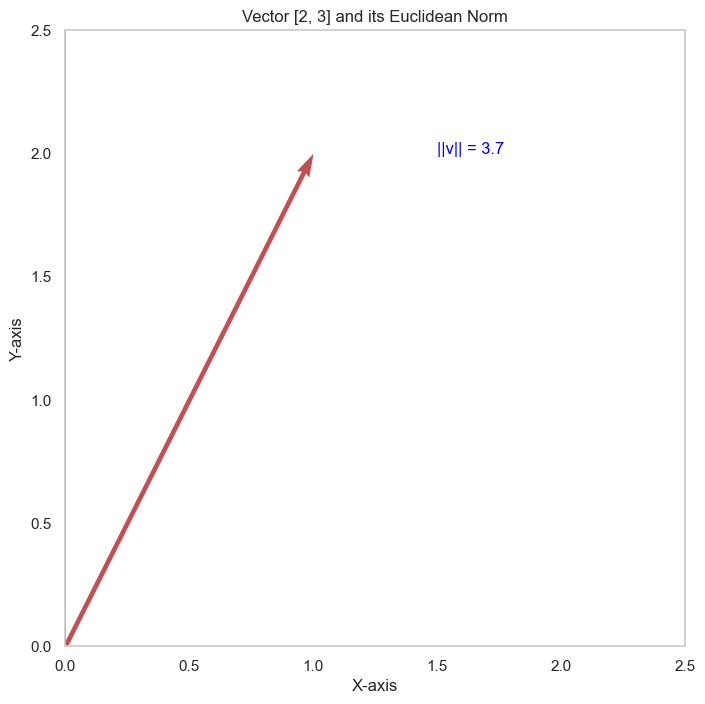

In [298]:
euclidean_norm = np.linalg.norm(v1)

plt.figure(figsize=(8, 8))
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r')
plt.xlim(0, 2.5)
plt.ylim(0, 2.5)
plt.grid()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

plt.text(vector[0] / 2, vector[1] / 2, f'||v|| = {euclidean_norm:.1f}', fontsize=12, color='blue')

plt.title('Vector [2, 3] and its Euclidean Norm')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

### Addition

In order to add 2 vectors, they must be of the same dimensionality

In [299]:
v1 = np.array([1,2])
v2 = np.array([3,4])

v1 + v2

array([4, 6])

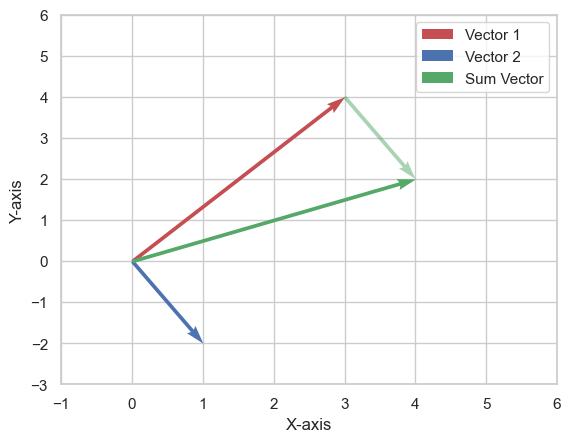

In [300]:
vector1 = np.array([3, 4])
vector2 = np.array([1, -2])

vector_sum = vector1 + vector2

fig, ax = plt.subplots()
origin = np.array([0, 0])

ax.quiver(*origin, *vector1, angles='xy', scale_units='xy', scale=1, color='r', label='Vector 1')
ax.quiver(*origin, *vector2, angles='xy', scale_units='xy', scale=1, color='b', label='Vector 2')
ax.quiver(*origin, *vector_sum, angles='xy', scale_units='xy', scale=1, color='g', label='Sum Vector')
ax.quiver(*vector1, *(vector_sum - vector1), angles='xy', scale_units='xy', scale=1, color='g',
          linestyle='dashed', alpha=0.5)

ax.set_xlim(-1, 6)
ax.set_ylim(-3, 6)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

ax.grid(True)

ax.legend()

ax.set_xticks(np.arange(-1, 7, 1))
ax.set_yticks(np.arange(-3, 7, 1))

plt.show()

### Multiplying a Vector By a Scalar

A scalar is number. Not a vector, just a plain old number. Multiplying a vector by a scalar does not change its direction, only its size.

In [301]:
v1 = np.array([1,2])
v1 * 2

array([2, 4])

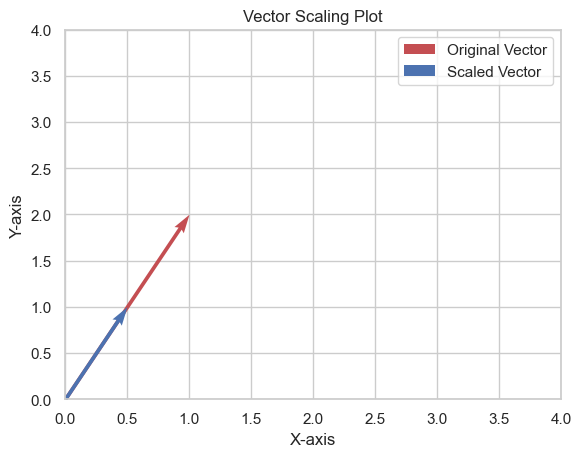

In [302]:
vector = np.array([1, 2])
scalar = 0.5

scaled_vector = scalar * vector

fig, ax = plt.subplots()
origin = np.array([0, 0])

ax.quiver(*origin, *vector, angles='xy', scale_units='xy', scale=1, color='r', label='Original Vector')
ax.quiver(*origin, *scaled_vector, angles='xy', scale_units='xy', scale=1, color='b', label='Scaled Vector')

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Vector Scaling Plot')

ax.grid(True)
ax.legend()
plt.show()

There are a few ways to multiplie 2 vectors, the most common are:

1. Dot product
2. Hadamard 
3. Outer product

### Dot Product/Scalar Product

The dot product is used to represent similarity, projection or interaction between two vectors.
For example, finding the angle between two vectors. The cosine of an angle between two vectors is a measurement of how similar they are (as we will shortly see).

In [98]:
v1 = np.array([1,2])
v2 = np.array([3,4])

dot_product = v1.dot(v2)
dot_product

11

Dot product result is a scalar!

In [99]:
v1 = np.array([1,2])
v2 = np.array([3,4, 3])

dot_product = v1.dot(v2)

ValueError: shapes (2,) and (3,) not aligned: 2 (dim 0) != 3 (dim 0)

In [100]:
a1_slider = widgets.IntSlider(min=-10, max=10, step=1, value=1, description='A1')
a2_slider = widgets.IntSlider(min=-10, max=10, step=1, value=1, description='A2')

b1_slider = widgets.IntSlider(min=-10, max=10, step=1, value=1, description='B1')
b2_slider = widgets.IntSlider(min=-10, max=10, step=1, value=1, description='B2')

def calculate_dot_product(a1, a2, b1, b2):
    vector_a = np.array([a1, a2])
    vector_b = np.array([b1, b2])
    dot_product = np.dot(vector_a, vector_b)
    print(f"Vector A: {vector_a}")
    print(f"Vector B: {vector_b}")
    print(f"Dot Product: {dot_product}")

output = widgets.interactive_output(calculate_dot_product, 
                                    {'a1': a1_slider, 'a2': a2_slider, 
                                     'b1': b1_slider, 'b2': b2_slider})

display(a1_slider, a2_slider, b1_slider, b2_slider, output)


IntSlider(value=1, description='A1', max=10, min=-10)

IntSlider(value=1, description='A2', max=10, min=-10)

IntSlider(value=1, description='B1', max=10, min=-10)

IntSlider(value=1, description='B2', max=10, min=-10)

Output()

#### What is Dot Product Useful For

1. Measuring the angle between two vectors.

In [101]:
# GloVe embeddings:

In [103]:
small_glove_embeddings = {
    'king': np.array([0.52654, -0.24538, 0.46737, 0.70348, 0.23647, 0.45902, -0.50265, -0.02281, 0.65211, -0.08349]),
    'queen': np.array([0.31703, -0.17573, 0.56205, 0.70857, 0.07399, 0.54469, -0.29225, -0.00839, 0.67575, 0.07804]),
    'man': np.array([0.42751, -0.20688, 0.45803, 0.63649, 0.18779, 0.31568, -0.37995, -0.06743, 0.48653, -0.09921]),
    'woman': np.array([0.25492, -0.15052, 0.52889, 0.67948, 0.04324, 0.44135, -0.21645, -0.05523, 0.56297, 0.03745]),
    'apple': np.array([0.19380, 0.21778, 0.38197, 0.66207, 0.08827, 0.28768, -0.34323, -0.10373, 0.52489, -0.16557]),
    'banana': np.array([0.11680, 0.27282, 0.31370, 0.58726, 0.16211, 0.35647, -0.32118, -0.12783, 0.50146, -0.19622]),
    'cat': np.array([0.24788, -0.04950, 0.31342, 0.63817, 0.03495, 0.21575, -0.28760, -0.08599, 0.46724, -0.18518]),
    'dog': np.array([0.30956, -0.06601, 0.29654, 0.58809, 0.09847, 0.23591, -0.31250, -0.05747, 0.49033, -0.14416]),
}

def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)
    if magnitude1 == 0 or magnitude2 == 0:
        return 0
    return dot_product / (magnitude1 * magnitude2)

KING = 'king'
QUEEN = 'queen'
BANANA = 'banana'

vector1 = small_glove_embeddings[KING]
vector2 = small_glove_embeddings[QUEEN]
vector_3 = small_glove_embeddings[BANANA]

similarity = cosine_similarity(vector1, vector2)
less_similarity = cosine_similarity(vector1, vector_3)

print(f"Cosine Similarity between '{KING}' and '{QUEEN}': {similarity}")
print(f"Cosine Similarity between '{KING}' and '{BANANA}': {less_similarity}")

Cosine Similarity between 'king' and 'queen': 0.9586061635641476
Cosine Similarity between 'king' and 'banana': 0.8538639120049808


In [104]:
king = small_glove_embeddings['king']
queen = small_glove_embeddings['queen']
man = small_glove_embeddings['man']
woman = small_glove_embeddings['woman']

In [105]:
transformed_woman = king - man + woman
small_glove_embeddings['transformed_woman'] = transformed_woman

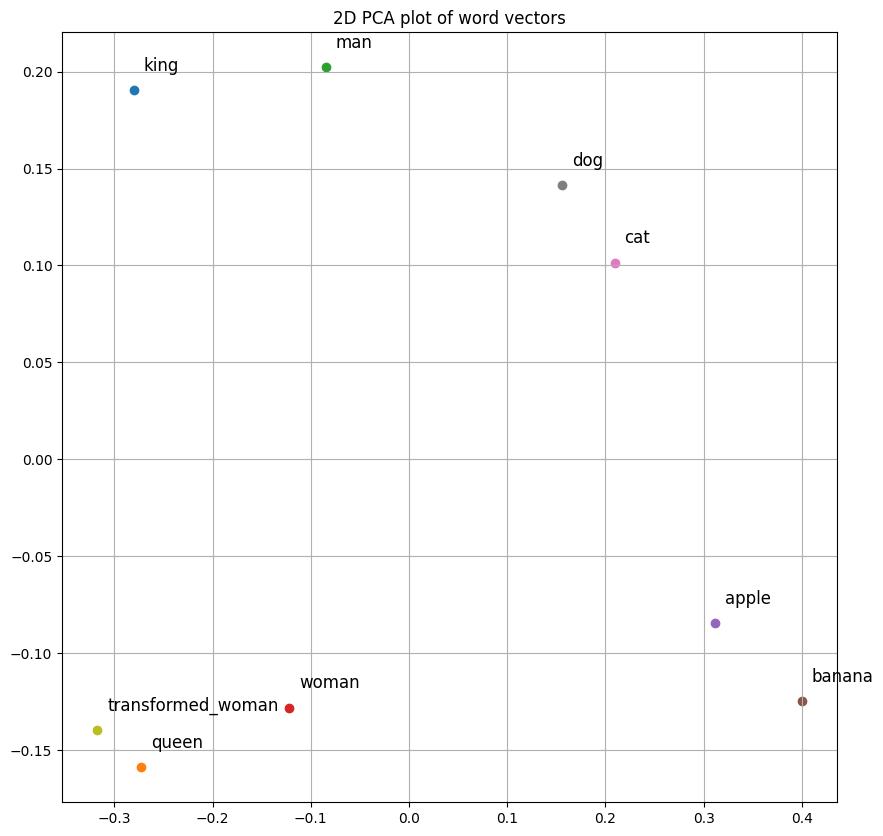

In [106]:
words = list(small_glove_embeddings.keys())
vectors = np.array(list(small_glove_embeddings.values()))

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

plt.figure(figsize=(10, 10))
for word, vector in zip(words, reduced_vectors):
    plt.scatter(vector[0], vector[1])
    plt.text(vector[0] + 0.01, vector[1] + 0.01, word, fontsize=12)

plt.title("2D PCA plot of word vectors")
plt.grid(True)
plt.show()

### Hadamard/Element Wise Product

Used in the attention mechanism and regularizations techniques like dropout.

In [107]:
v3 = [1, 2, 3]
v4 = [3, 4, 5]

np.multiply(v3, v4)

array([ 3,  8, 15])

In [108]:
v3 = [1, 2, 3]
v4 = [3, 4, 5, 2]

np.multiply(v3, v4)

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

### Outer Product

The outer product is used to create a matrix out of two vectors. One use of outer product is to do weights update in the back propagation phase.

In [109]:
v5 = np.array([1,2,3])

In [110]:
v1, v5

(array([1, 2]), array([1, 2, 3]))

In [111]:
np.outer(v1, v5)

array([[1, 2, 3],
       [2, 4, 6]])

### Exercise

Create the 3 matrix multiplication methods on your own.

numpy way of doing things

In [112]:
# dot product 
np.dot(v1,v2)

# Hadamard
v1 * v2

# outer product
np.outer(v1, v2)

ValueError: shapes (2,) and (3,) not aligned: 2 (dim 0) != 3 (dim 0)

## Subspace

A vector's subspace is the set of all vectors that can be created by taking a linear combination of a vector or some vectors

In [120]:
v1

array([2, 3])

In [121]:
v1_1 = v1 * 2
v1_1

array([4, 6])

In [122]:
v1_2 = v1 * 4.65
v1_2

array([ 9.3 , 13.95])

### Exercise

Are these vectors in the same subspace as v1?

In [303]:
v1

array([1, 2])

In [304]:
v1_3 = np.array([10, 20])

In [305]:
v1_4 = np.array([4, 10])

In [308]:
v1_5 = np.array([0,5, 1])

A subspace can also be comprised out of a few vectors, for example:

In [307]:
v1_6 = 3 * v1 - 2 * v2
v1_6

array([-3, -2])

v1_6 is a vector that is in the subspace that was defined using vectors v1 and v2

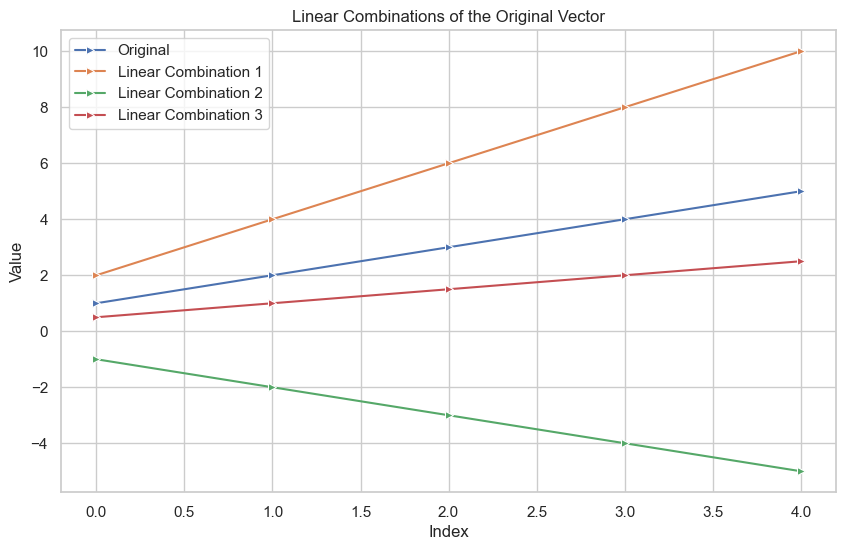

In [127]:
vector = np.array([1, 2, 3, 4, 5])

linear_comb1 = 2 * vector
linear_comb2 = -1 * vector
linear_comb3 = 0.5 * vector

data = pd.DataFrame({
    'Index': np.arange(len(vector)),
    'Original': vector,
    'Linear Combination 1': linear_comb1,
    'Linear Combination 2': linear_comb2,
    'Linear Combination 3': linear_comb3
})

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.lineplot(x='Index', y='Original', data=data, marker='>', label='Original')
sns.lineplot(x='Index', y='Linear Combination 1', data=data, marker='>', label='Linear Combination 1')
sns.lineplot(x='Index', y='Linear Combination 2', data=data, marker='>', label='Linear Combination 2')
sns.lineplot(x='Index', y='Linear Combination 3', data=data, marker='>', label='Linear Combination 3')

plt.title('Linear Combinations of the Original Vector')
plt.ylabel('Value')
plt.legend()
plt.show()

## Independent Vectors

If two vectors are independent of each other, their combination create a plain 

In [128]:
independent_vec_1 = np.array([1,2])
independent_vec_2 = np.array([2,5])

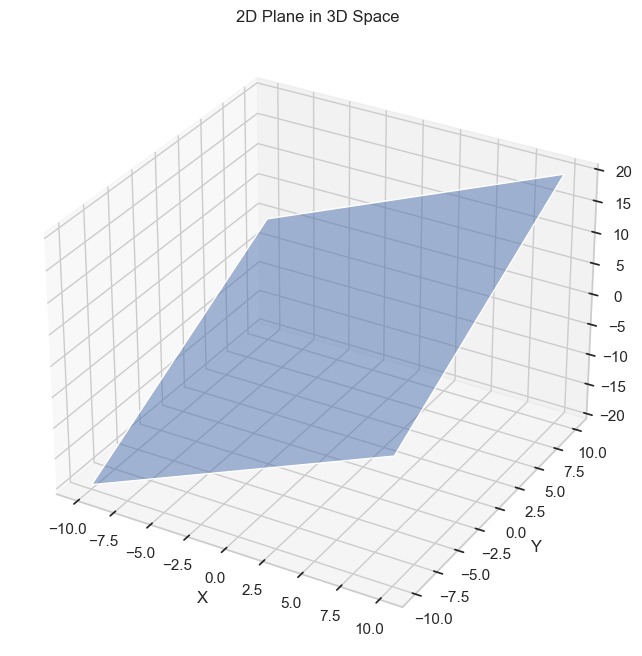

In [309]:
x = np.linspace(-10, 10, 10)
y = np.linspace(-10, 10, 10)
X, Y = np.meshgrid(x, y)

Z = X + Y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_title('2D Plane in 3D Space')

plt.show()

### Exercise

Write a function that determines whether two vectors are dependent.

# Matrices

A Matrix is a multi dimensional vector. Its denoted with a bold capital letter, such as <b> A </b>

A matrix is denoted as rows by columns, e.g. 3x4 means 3 rows and 4 columns

In [133]:
M = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

m1,2 = 2

m2,2 = 6

## Types of Matrices

There are endless types of matrices which are not critical for our business. Therefor I will only show a few so you get the idea

### Square Matrix

Square matrix - a matrix that its rows and columns are the same size. For example 3x3, 5x5, 12X12

In [134]:
M_square = np.array([
    [1, 2, 3],
    [5, 6, 7],
    [9, 10, 11]
])

### Identify Matrix

In [135]:
identity_matrix = np.eye(3)
identity_matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Identity matrix is the matrix equivalent of the number 1

In [136]:
M_square

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11]])

In [137]:
M_square * identity_matrix

array([[ 1.,  0.,  0.],
       [ 0.,  6.,  0.],
       [ 0.,  0., 11.]])

### Zero Matrix

In [138]:
zero_matrix = np.zeros((3, 3))

In [139]:
zero_matrix

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [140]:
M_square * zero_matrix

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### Diagonal Matrix

All numbers which are not in the main diagonal, are zero. The main diagonal can also be zero, but all the rest must be 0.

In [141]:
diagonal_matrix = np.diag([1, 2, 3])
diagonal_matrix

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

## Matrix Operations

### Matrix Addition & Substraction

In [142]:
m1 = np.array([
    [1,2],
    [4,5]
])
m1

array([[1, 2],
       [4, 5]])

In [143]:
m2 = np.array([
    [3,1],
    [2,-5]
])
m2

array([[ 3,  1],
       [ 2, -5]])

In [144]:
m1+m2

array([[4, 3],
       [6, 0]])

In [145]:
m1 - m2

array([[-2,  1],
       [ 2, 10]])

In [146]:
m_of_different_size = np.array([
    [1,2,3],
    [4,5,3]
])

In [147]:
m1 + m_of_different_size

ValueError: operands could not be broadcast together with shapes (2,2) (2,3) 

### Matrix Scalar Multiplication

In [148]:
m1

array([[1, 2],
       [4, 5]])

In [149]:
3 * m1

array([[ 3,  6],
       [12, 15]])

### Matrix Transpose

In [150]:
M

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [151]:
M.shape

(3, 4)

In [152]:
M.transpose().shape

(4, 3)

In [153]:
M.transpose()

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [154]:
m1

array([[1, 2],
       [4, 5]])

### Broadcasting

In [341]:
m_of_different_size.shape

(2, 3)

In [355]:
rank_three_vector = np.array([1,2,3])

In [356]:
rank_three_vector.shape

(3,)

In [359]:
m_of_different_size

array([[1, 2, 3],
       [4, 5, 3]])

In [357]:
m_of_different_size + rank_three_vector

array([[2, 4, 6],
       [5, 7, 6]])

In [358]:
m1 + m_of_different_size

ValueError: operands could not be broadcast together with shapes (2,2) (2,3) 

## Matrix Multiplication

Matrix multiplication animation: https://matrixmultiplication.xyz/

The most important rule of matrix multiplication: the numbers of columns in the left matrix must match the number of rows in the right matrix. If the condition is met the multiplication can be done and the result will be the number of rows of the left matrix vs the number of column of the right matrix.

3 X 2 @ 2 X 4 --- ?

3 X 4 @ 3 X 4 --- ?

3 X 5 @ 5 X 4 --- ?

7 X 11 @ 11 X 4 --- ?

(3 X 4 ).transpose() @ 4 X 3 --- ?

In [160]:
def gen_matrix(sizes: tuple) -> np.array:
    
    matrix = np.arange(1, np.prod(sizes) +1).reshape(sizes)
    
    return matrix

In [161]:
def multiplie_matrices(matrix_a_size: tuple, matrix_b_size: tuple):
    
    try:
    
        m_a = gen_matrix(matrix_a_size)
        m_b = gen_matrix(matrix_b_size)    

        return m_a @ m_b
    
    except ValueError as e:
        print('something went wrong')
        print(e)

In [162]:
multiplie_matrices((3,2), (2,4)).shape

(3, 4)

In [163]:
multiplie_matrices((3,4), (3,4)).shape

something went wrong
matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)


AttributeError: 'NoneType' object has no attribute 'shape'

In [164]:
multiplie_matrices((3,5), (5,4)).shape

(3, 4)

In [165]:
multiplie_matrices((7,11), (11,4)).shape

(7, 4)

In [166]:
three_by_four_matr @ three_by_four_matr

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

In [167]:
three_by_four_matr @ three_by_four_matr.transpose()

array([[ 30,  70, 110],
       [ 70, 174, 278],
       [110, 278, 446]])

In [168]:
three_by_four_matr @ four_by_three_matr

array([[ 70,  80,  90],
       [158, 184, 210],
       [246, 288, 330]])

In [169]:
four_by_three_matr @ three_by_four_matr

array([[ 38,  44,  50,  56],
       [ 83,  98, 113, 128],
       [128, 152, 176, 200],
       [173, 206, 239, 272]])

Note the two results are <b> not </b> the same

### Exercise

Build a function that does matrix multiplcation

## Matrix-Vector Multiplication

The result of a matrix-vector multiplication is a vector.

M @ v creates a weighted combination of the columns of M

In [172]:
rank_four_vector = np.array([1,1,1,1])

In [173]:
three_by_four_matr @ rank_four_vector

array([10, 26, 42])

In [174]:
three_by_four_matr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

v @ M creates a weighted combination of the rows of M

In [175]:
rank_four_vector.transpose() @ four_by_three_matr

array([22, 26, 30])

In [176]:
three_by_four_matr.shape

(3, 4)

## Matrices properties

### Matrix Span

The span of a matrix are all the matrices that can be reached through a linear combination of its vectors.

In [280]:
linearly_dependent_matrix = np.array([[1,2], [2, 4]])

In [281]:
A1 = gen_matrix((2,3))

In [282]:
A1

array([[1, 2, 3],
       [4, 5, 6]])

In [283]:
np.linalg.matrix_rank(linearly_dependent_matrix)

1

In [284]:
np.linalg.matrix_rank(A1)

2

### Matrix Rank

The rank of a matrix is the maximum number of linearly independent rows or columns in the matrix. It can be computed for any matrix, not only a square matrix. Its important for things like PCA

### Matrix determinant

A scalar that describes a matrix. Only a square matrix has a determinant

The determinant is 0 if all columns/rows are linearly dependent

If the determinant is 0, it means the matrix is completely dependent, a.k.a singular matrix.

In [251]:
A = np.array([[3, 1],
              [2, 4]])

det_A = np.linalg.det(A)

print("Determinant of A:", det_A)

Determinant of A: 10.000000000000002


In [252]:
A1 = np.array([[1,2], [2,4]])

det_A1 = np.linalg.det(A1)

print("Determinant of A1:", det_A1)

Determinant of A1: 0.0


In [253]:
B = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

det_B = np.linalg.det(B)

print("Determinant of B:", det_B)

Determinant of B: -9.51619735392994e-16


In [254]:
C = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])

det_C = np.linalg.det(C)

print("Determinant of C:", det_C)

Determinant of C: -1.439243268894363e-30


### Eigenvalues & Eigenvectors

If we multiple a matrix by a vector we get a vector.

In [286]:
three_by_four_matr @ np.array([1, 2, 3, 4])

array([ 30,  70, 110])

The purpose of eigendecomposition is to extract two kinds of features from a square matrix. Eigen values (scalar) and eigen vectors (vectors)

For a matrix of size n x n, there are n eigen values and n eigen vectors. Each eigen value has its own eigen vector.

Eigenvector is a vector that I can multiple by some matrix and get the same vector multiplied by some scalar.

Only a square matrix has eigen values and vectors

Note: The calculation returned is column vector, not row vector.

\begin{align*}
A &= \begin{pmatrix} 2 & 1 \\ 1 & 3 \end{pmatrix}, \\
\text{Eigenvalues:} & \\
\lambda_1 &= \frac{5 + \sqrt{5}}{2}, \\
\lambda_2 &= \frac{5 - \sqrt{5}}{2}, \\
\text{Corresponding Eigenvectors:} & \\
\mathbf{v}_1 &= \begin{pmatrix} 1 \\ \frac{-1 + \sqrt{5}}{2} \end{pmatrix}, \\
\mathbf{v}_2 &= \begin{pmatrix} 1 \\ \frac{-1 - \sqrt{5}}{2} \end{pmatrix}.
\end{align*}


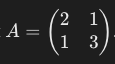

Eigenvalues:

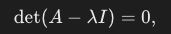

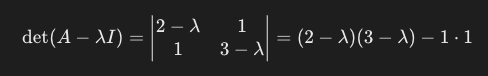

Eigenvectors

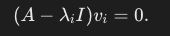

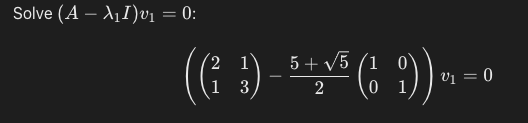

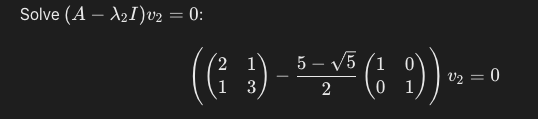

In [288]:
A = np.array([[4, 1],
              [2, 3]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [5. 2.]
Eigenvectors:
 [[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


In [289]:
v = np.array([0.70710678, 0.70710678])

lambda_val = 5

Av = A @ v

lambda_v = lambda_val * v

print("A @ v:\n", Av)
print("lambda * v:\n", lambda_v)

print("Are A @ v and lambda * v approximately equal?", np.allclose(Av, lambda_v))

A @ v:
 [3.5355339 3.5355339]
lambda * v:
 [3.5355339 3.5355339]
Are A @ v and lambda * v approximately equal? True


In [290]:
v2 = np.array([ -0.4472136,  0.89442719])
lambda_val = 2

lambda_val2  = lambda_val * v2
Av2 = A @ v2

In [291]:
np.allclose(Av2, lambda_val2)

True

There is some vector v that if I multiple by matrix A, the matrix behaves as if it was a scalar. Meaning I get the same result as if I would multiple a scalar.

In this case v is the eigen vector and lambda is its eigen value

Eigenvector is a vector that after matrix multiplication has not changed at all, except for by some scalar

There is a matrix in the world, that if I multiple it by a vector, the vector stays on the same direction. So it doesnt change. It stays on the same one dimensional subspace. Vector v doesnt change, its the same, just longer or shorter.

lambad @ v = A @ v

If this is true, if we can find a lanbda that acts as if it was a matrix of the same vector, then lambda is the eigen value of the matrix and v is the eigen vector of the matrix.

In [ ]:
def return_eigen_values_and_vectors(matrix: np.array):
    
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    
    return eigenvalues, eigenvectors